In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
api = wandb.Api()

In [5]:
base_str = "/f-krone/"
runs = [("fetch-push-ensemble/runs/32ksdfsl", "", "state"), ("fetch-push-ensemble-preference/runs/1pfgvt8j", "SAC_1/", "pixel+robot+ensemble")]

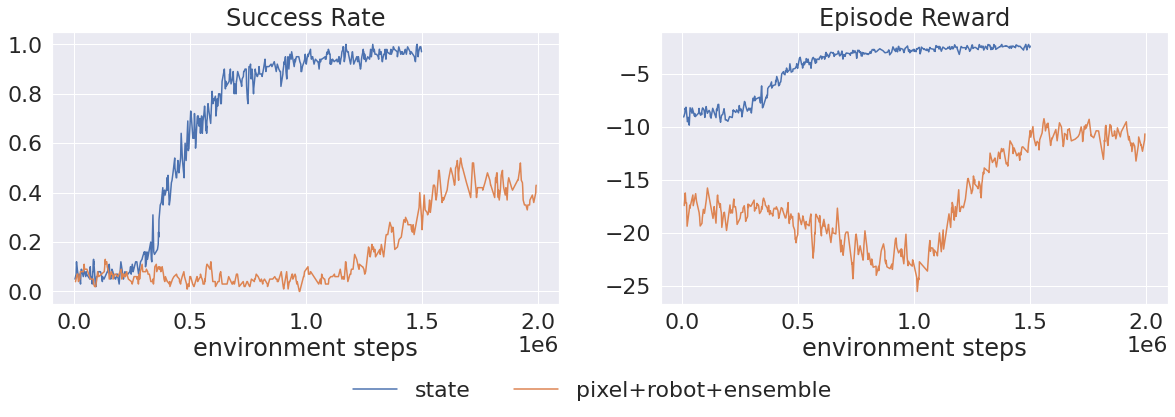

In [10]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.set_theme()
sns.set(font_scale=2)
for run_id, prefix, label in runs:
    run = api.run(base_str + run_id)
    data = run.history()
    sns.lineplot(data=data, x=prefix + "global_step", y=prefix + "rollout/success_rate", label=label, ax=ax1, legend=False)
    sns.lineplot(data=data, x=prefix + "global_step", y=prefix + "rollout/ep_rew_mean", label=label, ax=ax2, legend=False)

ax1.set_title("Success Rate")
ax1.set_xlabel("environment steps")
ax1.set_ylabel("")
ax2.set_title("Episode Reward")
ax2.set_xlabel("environment steps")
ax2.set_ylabel("")
fig.legend(list(map(lambda x: x[2], iter(runs))))
sns.move_legend(fig, "lower center", bbox_to_anchor=(.5, -0.2), ncol=3, title=None, frameon=False)
plt.savefig('push.png', bbox_inches='tight', pad_inches=0)